## 1. Setup & Load Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime, timedelta

# Setup
plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_columns', None)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Load daily data (easier to work with for tourism features)
data_dir = Path('../data/processed')
daily = pd.read_parquet(data_dir / 'daily' / 'all_locations_daily.parquet')

print(f"✅ Loaded {len(daily):,} daily records")
print(f"Date range: {daily['date'].min()} to {daily['date'].max()}")
print(f"Locations: {daily['location_code'].nunique()}")

✅ Loaded 10,965 daily records
Date range: 2019-12-31 22:00:00+00:00 to 2021-12-30 22:00:00+00:00
Locations: 15


In [3]:
# Create a working copy
df = daily.copy()

# Convert date to datetime if not already
df['date'] = pd.to_datetime(df['date'])

print(f"Working with {len(df):,} records")
df.head()

Working with 10,965 records


,date,location_code,location_name,weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,sunset,sunrise,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,et0_fao_evapotranspiration,shortwave_radiation_sum,wind_direction_10m_dominant,wind_gusts_10m_max,wind_speed_10m_max,cloud_cover_mean,cloud_cover_max,cloud_cover_min,dew_point_2m_mean,dew_point_2m_max,dew_point_2m_min,pressure_msl_min,pressure_msl_max,pressure_msl_mean,snowfall_water_equivalent_sum,relative_humidity_2m_min,relative_humidity_2m_max,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean,surface_pressure_mean,surface_pressure_max,surface_pressure_min,winddirection_10m_dominant,wind_gusts_10m_mean,wind_speed_10m_mean,wind_gusts_10m_min,wind_speed_10m_min,wet_bulb_temperature_2m_mean,wet_bulb_temperature_2m_max,wet_bulb_temperature_2m_min,vapour_pressure_deficit_max,soil_moisture_0_to_100cm_mean,soil_moisture_0_to_7cm_mean,soil_moisture_28_to_100cm_mean,soil_moisture_7_to_28cm_mean,soil_temperature_0_to_100cm_mean,soil_temperature_0_to_7cm_mean,soil_temperature_28_to_100cm_mean,soil_temperature_7_to_28cm_mean
0,2019-12-31 22:00:00+00:00,bloemfontein,Bloemfontein,1.0,25.016916,31.819,18.019001,24.078827,31.705246,17.826836,46725.457,50289.270,1577899055,1577848766,0.0,0.0,0.0,0.0,7.779589,30.81,341.543520,45.000000,22.461807,8.041667,40.0,0.0,12.258584,16.869001,6.019000,1006.3,1014.1,1010.71265,0.0,21.677520,88.94883,7.779589,50.235897,863.72650,866.16640,862.11566,341.543520,33.105000,15.867417,23.759998,8.699793,17.331568,19.974945,15.726658,3.671774,0.192648,0.229792,0.177875,0.230917,22.884771,25.346083,22.294000,24.089834
1,2019-12-31 22:00:00+00:00,cape_town,Cape Town,0.0,21.097834,26.427,16.927000,19.105175,26.266890,15.144316,48486.457,51715.960,1577901606,1577849891,0.0,0.0,0.0,0.0,6.486071,32.96,165.195530,67.679990,37.894165,0.083333,1.0,0.0,14.968667,16.627000,13.177000,1012.1,1014.3,1013.08325,0.0,51.350600,86.51658,6.486071,69.329216,1011.08594,1012.28200,1010.11110,165.195530,53.474995,28.802786,36.000000,20.545246,17.073410,19.543360,14.912857,1.654679,0.080947,0.042500,0.091500,0.057583,22.685608,26.143667,21.904085,24.212418
2,2019-12-31 22:00:00+00:00,durban,Durban,51.0,23.342169,26.838,19.438000,25.945421,29.393375,20.495188,36555.020,50488.720,1577898001,1577847512,0.3,0.3,0.0,3.0,3.976006,20.17,169.154250,33.839996,16.263872,79.041664,100.0,23.0,19.198418,22.588000,15.938001,1011.7,1016.7,1014.28320,0.0,66.132030,94.13106,3.976006,77.965750,1011.36640,1013.74744,1008.81450,169.154250,17.535002,7.548140,4.320000,1.800000,20.439493,22.849794,17.064041,1.123794,0.146303,0.131458,0.152417,0.130292,24.227333,25.233835,23.996336,24.683836
3,2019-12-31 22:00:00+00:00,east_london,East London,51.0,21.395752,23.002,18.652000,20.926043,21.970680,18.588522,23101.148,51429.516,1577899201,1577847771,0.6,0.6,0.0,4.0,3.631637,15.52,59.718273,55.440000,25.233406,66.916664,100.0,7.0,16.206167,17.752000,14.502000,1013.6,1016.6,1015.14996,0.0,64.103160,79.95959,3.631637,72.449480,1010.10210,1011.51920,1008.58200,59.718273,39.135000,18.009800,21.240000,10.028439,17.883190,18.967064,15.971016,1.008609,0.117912,0.093708,0.116083,0.132250,21.816810,22.364502,21.601997,22.370750
4,2019-12-31 22:00:00+00:00,franschhoek,Franschhoek,0.0,22.276001,30.851,15.101001,22.357750,34.334667,14.039898,48486.457,51715.960,1577901498,1577849783,0.0,0.0,0.0,0.0,7.139920,33.33,125.389694,61.199997,18.032370,0.416667,2.0,0.0,13.430167,16.001000,11.751000,1010.7,1014.7,1012.83740,0.0,31.166971,85.86002,7.139920,60.352580,979.86570,981.04504,978.48016,125.389694,44.160000,12.376876,18.359999,2.968636,16.664557,20.230051,13.343870,3.065780,0.196201,0.177208,0.194667,0.207792,21.345627,25.282250,20.309332,23.586416


## 2. Time-Based Features

Extract temporal patterns that affect tourism

In [4]:
# Extract basic time components
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
df['day_name'] = df['date'].dt.day_name()
df['week_of_year'] = df['date'].dt.isocalendar().week
df['quarter'] = df['date'].dt.quarter

print("✅ Basic time features created")
df[['date', 'year', 'month', 'day_of_week', 'day_name']].head()

✅ Basic time features created


,date,year,month,day_of_week,day_name
0,2019-12-31 22:00:00+00:00,2019,12,1,Tuesday
1,2019-12-31 22:00:00+00:00,2019,12,1,Tuesday
2,2019-12-31 22:00:00+00:00,2019,12,1,Tuesday
3,2019-12-31 22:00:00+00:00,2019,12,1,Tuesday
4,2019-12-31 22:00:00+00:00,2019,12,1,Tuesday


In [5]:
# Weekend indicator (Friday, Saturday, Sunday for SA tourism)
df['is_weekend'] = df['day_of_week'].isin([4, 5, 6])  # Fri, Sat, Sun

# Long weekend check (Friday or Monday)
df['is_long_weekend_day'] = df['day_of_week'].isin([0, 4])  # Mon or Fri

print(f"Weekend days: {df['is_weekend'].sum():,} ({df['is_weekend'].sum()/len(df)*100:.1f}%)")

Weekend days: 4,680 (42.7%)


In [6]:
# South African Seasons (opposite of Northern Hemisphere!)
def get_sa_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:  # 9, 10, 11
        return 'Spring'

df['season'] = df['month'].apply(get_sa_season)

# Season distribution
print("\nSeason distribution:")
print(df['season'].value_counts().sort_index())


Season distribution:
season
Autumn    2760
Spring    2730
Summer    2715
Winter    2760
Name: count, dtype: int64


In [7]:
# South African Public Holidays (major ones)
# Note: This is simplified - in production, use a holidays library
sa_holidays_2020 = [
    '2020-01-01',  # New Year
    '2020-03-21',  # Human Rights Day
    '2020-04-10',  # Good Friday
    '2020-04-13',  # Family Day
    '2020-04-27',  # Freedom Day
    '2020-05-01',  # Workers Day
    '2020-06-16',  # Youth Day
    '2020-08-09',  # Women's Day
    '2020-09-24',  # Heritage Day
    '2020-12-16',  # Day of Reconciliation
    '2020-12-25',  # Christmas
    '2020-12-26',  # Day of Goodwill
]

sa_holidays_2021 = [
    '2021-01-01',  # New Year
    '2021-03-21',  # Human Rights Day
    '2021-04-02',  # Good Friday
    '2021-04-05',  # Family Day
    '2021-04-27',  # Freedom Day
    '2021-05-01',  # Workers Day
    '2021-06-16',  # Youth Day
    '2021-08-09',  # Women's Day
    '2021-09-24',  # Heritage Day
    '2021-12-16',  # Day of Reconciliation
    '2021-12-25',  # Christmas
    '2021-12-26',  # Day of Goodwill
]

all_holidays = pd.to_datetime(sa_holidays_2020 + sa_holidays_2021)
df['is_public_holiday'] = df['date'].isin(all_holidays)

print(f"\nPublic holidays in data: {df['is_public_holiday'].sum()}")


Public holidays in data: 0


In [8]:
# School holiday periods (major tourism driver in SA!)
# Approximate dates - actual dates vary by province
def is_school_holiday(date):
    month = date.month
    day = date.day
    
    # December holidays (biggest tourism season)
    if month == 12 or (month == 1 and day <= 15):
        return True
    # Easter holidays (March/April - 2 weeks)
    elif month == 3 or month == 4:
        if 15 <= day <= 30:
            return True
    # Winter holidays (June/July - 3 weeks)
    elif month == 6 or month == 7:
        if day >= 15 or (month == 7 and day <= 10):
            return True
    # Spring holidays (September - 1 week)
    elif month == 9:
        if 20 <= day <= 30:
            return True
    return False

df['is_school_holiday'] = df['date'].apply(is_school_holiday)

print(f"School holiday days: {df['is_school_holiday'].sum():,} ({df['is_school_holiday'].sum()/len(df)*100:.1f}%)")

School holiday days: 3,960 (36.1%)


## 3. Weather Comfort Features

Create tourism-relevant weather indicators

In [9]:
# Temperature comfort categories
def categorize_temperature(temp):
    if temp < 10:
        return 'Cold'
    elif temp < 18:
        return 'Cool'
    elif temp < 28:
        return 'Comfortable'
    elif temp < 35:
        return 'Hot'
    else:
        return 'Very Hot'

df['temp_category'] = df['temperature_2m_mean'].apply(categorize_temperature)

# Temperature comfort indicators
df['is_comfortable_temp'] = df['temperature_2m_mean'].between(18, 28)
df['is_hot_day'] = df['temperature_2m_max'] > 30
df['is_cold_day'] = df['temperature_2m_min'] < 10

print("Temperature categories:")
print(df['temp_category'].value_counts())

Temperature categories:
temp_category
Comfortable    5345
Cool           5152
Cold            438
Hot              30
Name: count, dtype: int64


In [10]:
# Precipitation indicators
df['is_rainy'] = df['precipitation_sum'] > 2  # More than 2mm
df['is_very_rainy'] = df['precipitation_sum'] > 10  # Heavy rain
df['is_dry'] = df['precipitation_sum'] < 0.5  # Essentially dry

# Rain intensity category
def categorize_rain(precip):
    if precip == 0:
        return 'No Rain'
    elif precip < 2:
        return 'Light'
    elif precip < 10:
        return 'Moderate'
    elif precip < 20:
        return 'Heavy'
    else:
        return 'Very Heavy'

df['rain_category'] = df['precipitation_sum'].apply(categorize_rain)

print(f"\nRainy days: {df['is_rainy'].sum():,} ({df['is_rainy'].sum()/len(df)*100:.1f}%)")
print(f"Dry days: {df['is_dry'].sum():,} ({df['is_dry'].sum()/len(df)*100:.1f}%)")


Rainy days: 2,197 (20.0%)
Dry days: 7,274 (66.3%)


In [11]:
# Wind indicators
df['is_windy'] = df['wind_speed_10m_max'] > 30  # km/h
df['is_very_windy'] = df['wind_speed_10m_max'] > 50

print(f"Windy days: {df['is_windy'].sum():,} ({df['is_windy'].sum()/len(df)*100:.1f}%)")

Windy days: 1,282 (11.7%)


In [12]:
# Composite weather quality scores

# Perfect Day Score (0-100)
# Good temperature + dry + sunny + low wind
df['perfect_day_score'] = (
    (df['is_comfortable_temp'].astype(int) * 30) +  # 30 points for good temp
    (df['is_dry'].astype(int) * 25) +               # 25 points for dry
    ((df['sunshine_duration'] / 3600 / 12) * 30) +  # 30 points for sunshine (normalize to 0-1)
    ((1 - df['wind_speed_10m_max'] / 60) * 15)      # 15 points for low wind
)
df['perfect_day_score'] = df['perfect_day_score'].clip(0, 100)

# Perfect day indicator
df['is_perfect_day'] = df['perfect_day_score'] > 80

print(f"\nPerfect days: {df['is_perfect_day'].sum():,} ({df['is_perfect_day'].sum()/len(df)*100:.1f}%)")
print(f"Average perfect day score: {df['perfect_day_score'].mean():.1f}/100")


Perfect days: 3,419 (31.2%)
Average perfect day score: 65.5/100


## 4. Location-Specific Features

Categorize locations by tourism type

In [14]:
# Location categories based on tourism type
coastal_locations = ['cape_town', 'durban', 'port_elizabeth', 'east_london', 'hermanus', 'knysna']
wine_regions = ['stellenbosch', 'franschhoek', 'paarl']
safari_gateways = ['nelspruit', 'polokwane']
city_business = ['johannesburg', 'pretoria', 'bloemfontein']
adventure_outdoor = ['knysna', 'hermanus', 'port_elizabeth']

df['is_coastal'] = df['location_code'].isin(coastal_locations)
df['is_wine_region'] = df['location_code'].isin(wine_regions)
df['is_safari_gateway'] = df['location_code'].isin(safari_gateways)
df['is_city_business'] = df['location_code'].isin(city_business)
df['is_adventure'] = df['location_code'].isin(adventure_outdoor)

print("Location type distribution:")
print(f"Coastal: {df['is_coastal'].sum():,}")
print(f"Wine Region: {df['is_wine_region'].sum():,}")
print(f"Safari Gateway: {df['is_safari_gateway'].sum():,}")
print(f"City/Business: {df['is_city_business'].sum():,}")

Location type distribution:
Coastal: 4,386
Wine Region: 2,193
Safari Gateway: 1,462
City/Business: 2,193


In [15]:
# Activity-specific weather indicators

# Perfect Beach Day (coastal locations)
df['perfect_beach_day'] = (
    df['is_coastal'] &
    (df['temperature_2m_max'] > 24) &
    (df['temperature_2m_max'] < 35) &
    (df['precipitation_sum'] < 1) &
    (df['wind_speed_10m_max'] < 30) &
    (df['sunshine_duration'] > 6 * 3600)  # 6+ hours of sun
)

# Perfect Wine Tasting Day (wine regions)
df['perfect_wine_day'] = (
    df['is_wine_region'] &
    (df['temperature_2m_mean'].between(18, 28)) &
    (df['precipitation_sum'] < 2) &
    (df['wind_speed_10m_max'] < 25) &
    (df['cloud_cover_mean'] < 60)  # Not too cloudy
)

# Perfect Safari Day (safari gateways)
df['perfect_safari_day'] = (
    df['is_safari_gateway'] &
    (df['temperature_2m_mean'].between(15, 30)) &
    (df['precipitation_sum'] < 5) &  # Light rain OK
    (df['wind_speed_10m_max'] < 35)
)

print(f"\nPerfect beach days: {df['perfect_beach_day'].sum():,}")
print(f"Perfect wine days: {df['perfect_wine_day'].sum():,}")
print(f"Perfect safari days: {df['perfect_safari_day'].sum():,}")


Perfect beach days: 891
Perfect wine days: 586
Perfect safari days: 1,044


## 5. Tourism Season Features

High/low season varies by location!

In [16]:
# Tourism peak season by location type
def get_tourism_season(row):
    month = row['month']
    location = row['location_code']
    
    # Coastal destinations: peak in Dec-Feb (summer)
    if location in coastal_locations:
        if month in [12, 1, 2]:
            return 'Peak'
        elif month in [11, 3, 4]:
            return 'Shoulder'
        else:
            return 'Low'
    
    # Wine regions: peak in Feb-May (harvest) and Oct-Nov (spring)
    elif location in wine_regions:
        if month in [2, 3, 4, 10, 11]:
            return 'Peak'
        elif month in [1, 5, 9, 12]:
            return 'Shoulder'
        else:
            return 'Low'
    
    # Safari: peak in dry winter (Jun-Sep) and summer (Dec-Feb)
    elif location in safari_gateways:
        if month in [6, 7, 8, 12, 1]:
            return 'Peak'
        elif month in [5, 9, 11, 2]:
            return 'Shoulder'
        else:
            return 'Low'
    
    # Cities: business travel year-round, leisure in summer
    else:
        if month in [12, 1, 4, 7]:  # Holidays
            return 'Peak'
        elif month in [11, 2, 3, 6, 8, 9]:
            return 'Shoulder'
        else:
            return 'Low'

df['tourism_season'] = df.apply(get_tourism_season, axis=1)

print("Tourism season distribution:")
print(df['tourism_season'].value_counts())

Tourism season distribution:
tourism_season
Shoulder    3752
Low         3624
Peak        3589
Name: count, dtype: int64


In [17]:
# Tourism season binary indicators
df['is_peak_season'] = df['tourism_season'] == 'Peak'
df['is_low_season'] = df['tourism_season'] == 'Low'

print(f"\nPeak season days: {df['is_peak_season'].sum():,} ({df['is_peak_season'].sum()/len(df)*100:.1f}%)")
print(f"Low season days: {df['is_low_season'].sum():,} ({df['is_low_season'].sum()/len(df)*100:.1f}%)")


Peak season days: 3,589 (32.7%)
Low season days: 3,624 (33.1%)


## 6. Aggregated Features

Rolling averages and streaks

In [18]:
# Sort by location and date for rolling calculations
df = df.sort_values(['location_code', 'date'])

# 7-day rolling averages (by location)
df['temp_7day_avg'] = df.groupby('location_code')['temperature_2m_mean'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)

df['precip_7day_sum'] = df.groupby('location_code')['precipitation_sum'].transform(
    lambda x: x.rolling(window=7, min_periods=1).sum()
)

# 3-day rolling averages
df['temp_3day_avg'] = df.groupby('location_code')['temperature_2m_mean'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

print("✅ Rolling averages calculated")

✅ Rolling averages calculated


In [19]:
# Consecutive dry/rainy days
def count_consecutive(series):
    """Count consecutive True values"""
    consecutive = []
    count = 0
    for val in series:
        if val:
            count += 1
        else:
            count = 0
        consecutive.append(count)
    return consecutive

# Consecutive dry days (by location)
df['consecutive_dry_days'] = df.groupby('location_code')['is_dry'].transform(count_consecutive)

# Consecutive rainy days
df['consecutive_rainy_days'] = df.groupby('location_code')['is_rainy'].transform(count_consecutive)

print(f"\nMax consecutive dry days: {df['consecutive_dry_days'].max()}")
print(f"Max consecutive rainy days: {df['consecutive_rainy_days'].max()}")


Max consecutive dry days: 79
Max consecutive rainy days: 14


In [20]:
# Temperature change from previous day
df['temp_change_1day'] = df.groupby('location_code')['temperature_2m_mean'].diff()

# Sudden temperature changes (>5°C)
df['sudden_temp_change'] = df['temp_change_1day'].abs() > 5

print(f"Days with sudden temperature changes: {df['sudden_temp_change'].sum():,}")

Days with sudden temperature changes: 251


## 7. Feature Summary & Validation

In [21]:
# List all engineered features
original_cols = daily.columns.tolist()
new_features = [col for col in df.columns if col not in original_cols]

print(f"\n{'='*70}")
print(f"FEATURE ENGINEERING SUMMARY")
print(f"{'='*70}")
print(f"Original variables: {len(original_cols)}")
print(f"New features created: {len(new_features)}")
print(f"Total features: {len(df.columns)}")
print(f"\nNew features created:")
for i, feature in enumerate(new_features, 1):
    print(f"  {i:2d}. {feature}")


FEATURE ENGINEERING SUMMARY
Original variables: 57
New features created: 42
Total features: 99

New features created:
   1. year
   2. month
   3. day
   4. day_of_week
   5. day_name
   6. week_of_year
   7. quarter
   8. is_weekend
   9. is_long_weekend_day
  10. season
  11. is_public_holiday
  12. is_school_holiday
  13. temp_category
  14. is_comfortable_temp
  15. is_hot_day
  16. is_cold_day
  17. is_rainy
  18. is_very_rainy
  19. is_dry
  20. rain_category
  21. is_windy
  22. is_very_windy
  23. perfect_day_score
  24. is_perfect_day
  25. is_coastal
  26. is_wine_region
  27. is_safari_gateway
  28. is_city_business
  29. is_adventure
  30. perfect_beach_day
  31. perfect_wine_day
  32. perfect_safari_day
  33. tourism_season
  34. is_peak_season
  35. is_low_season
  36. temp_7day_avg
  37. precip_7day_sum
  38. temp_3day_avg
  39. consecutive_dry_days
  40. consecutive_rainy_days
  41. temp_change_1day
  42. sudden_temp_change


In [22]:
# Check for missing values in new features
missing = df[new_features].isnull().sum()
missing = missing[missing > 0]

if len(missing) > 0:
    print("\n⚠️ Missing values in new features:")
    print(missing)
else:
    print("\n✅ No missing values in new features!")


⚠️ Missing values in new features:
temp_change_1day    15
dtype: int64


In [23]:
# Sample of engineered features
sample_features = [
    'date', 'location_name', 'temperature_2m_mean', 'precipitation_sum',
    'season', 'is_weekend', 'is_perfect_day', 'perfect_day_score',
    'tourism_season', 'temp_category', 'rain_category'
]

print("\nSample of data with new features:")
df[sample_features].head(10)


Sample of data with new features:


,date,location_name,temperature_2m_mean,precipitation_sum,season,is_weekend,is_perfect_day,perfect_day_score,tourism_season,temp_category,rain_category
0,2019-12-31 22:00:00+00:00,Bloemfontein,25.016916,0.000000,Summer,False,True,96.832782,Peak,Comfortable,No Rain
15,2020-01-01 22:00:00+00:00,Bloemfontein,24.639837,0.200000,Summer,False,True,97.136916,Peak,Comfortable,Light
30,2020-01-02 22:00:00+00:00,Bloemfontein,24.879417,0.600000,Summer,False,False,70.013062,Peak,Comfortable,Light
45,2020-01-03 22:00:00+00:00,Bloemfontein,24.471085,0.600000,Summer,True,False,72.256990,Peak,Comfortable,Light
60,2020-01-04 22:00:00+00:00,Bloemfontein,24.544000,0.100000,Summer,True,True,97.659685,Peak,Comfortable,Light
75,2020-01-05 22:00:00+00:00,Bloemfontein,26.131500,0.600000,Summer,True,False,71.556418,Peak,Comfortable,Light
90,2020-01-06 22:00:00+00:00,Bloemfontein,19.166918,11.700001,Summer,False,False,43.054351,Peak,Comfortable,Heavy
105,2020-01-07 22:00:00+00:00,Bloemfontein,18.758581,25.600002,Summer,False,False,49.661289,Peak,Comfortable,Very Heavy
120,2020-01-08 22:00:00+00:00,Bloemfontein,21.231500,0.900000,Summer,False,False,61.731976,Peak,Comfortable,Light
135,2020-01-09 22:00:00+00:00,Bloemfontein,21.133583,5.300000,Summer,False,False,72.716375,Peak,Comfortable,Moderate


## 8. Feature Analysis

Quick insights from engineered features

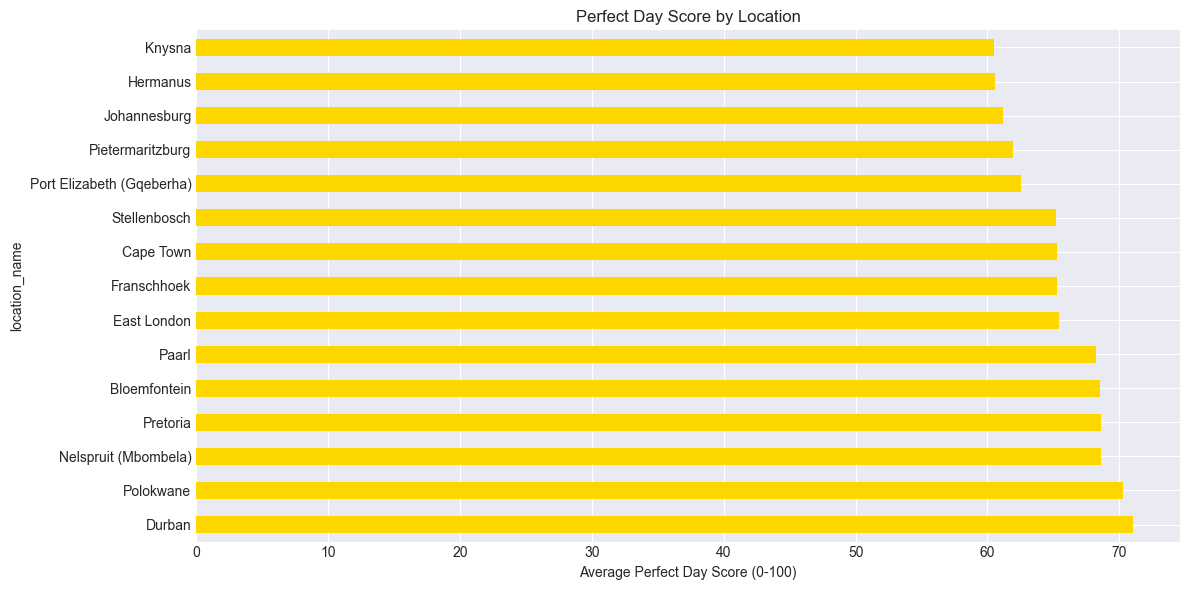

Top 5 locations for perfect weather:
location_name
Durban                  71.047301
Polokwane               70.272410
Nelspruit (Mbombela)    68.632387
Pretoria                68.589085
Bloemfontein            68.567788
Name: perfect_day_score, dtype: float64


In [24]:
# Perfect day score by location
perfect_score_by_loc = df.groupby('location_name')['perfect_day_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
perfect_score_by_loc.plot(kind='barh', color='gold')
plt.xlabel('Average Perfect Day Score (0-100)')
plt.title('Perfect Day Score by Location')
plt.tight_layout()
plt.show()

print("Top 5 locations for perfect weather:")
print(perfect_score_by_loc.head())

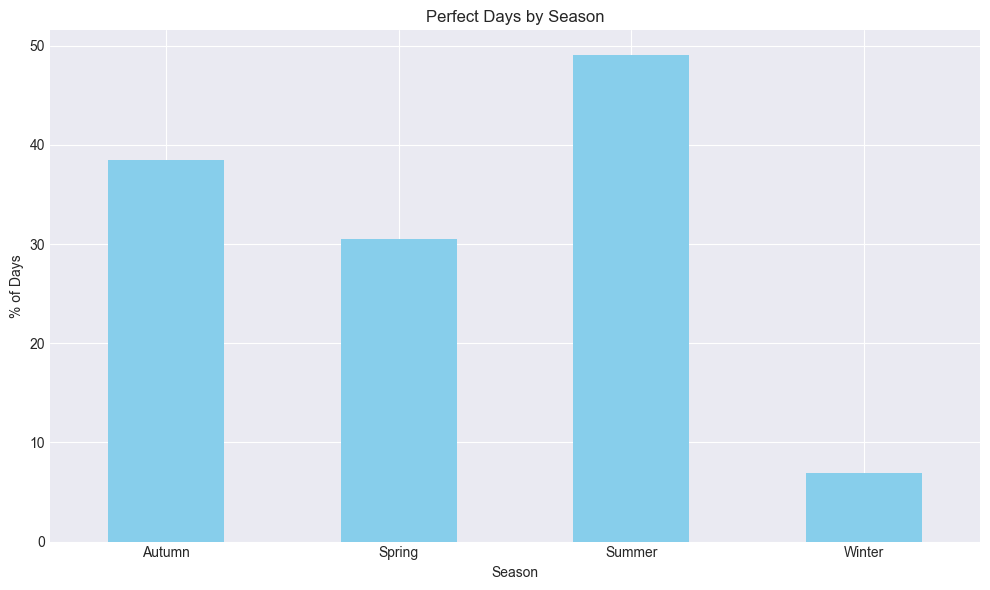


Perfect days by season:
season
Autumn    38.5
Spring    30.5
Summer    49.1
Winter     6.9
Name: is_perfect_day, dtype: float64


In [25]:
# Perfect days by season
perfect_by_season = df.groupby('season')['is_perfect_day'].mean() * 100

plt.figure(figsize=(10, 6))
perfect_by_season.plot(kind='bar', color='skyblue')
plt.ylabel('% of Days')
plt.xlabel('Season')
plt.title('Perfect Days by Season')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nPerfect days by season:")
print(perfect_by_season.round(1))

In [26]:
# Tourism season vs weather quality
season_weather = df.groupby('tourism_season').agg({
    'perfect_day_score': 'mean',
    'temperature_2m_mean': 'mean',
    'precipitation_sum': 'mean',
    'is_perfect_day': lambda x: (x.sum() / len(x) * 100)
}).round(2)

season_weather.columns = ['Avg Perfect Score', 'Avg Temp (°C)', 'Avg Rain (mm)', '% Perfect Days']

print("\nWeather quality by tourism season:")
print(season_weather)


Weather quality by tourism season:
                Avg Perfect Score  Avg Temp (°C)  Avg Rain (mm)  \
tourism_season                                                    
Low                         56.87          15.72           2.28   
Peak                        71.53          19.11           2.15   
Shoulder                    68.19          18.21           1.81   

                % Perfect Days  
tourism_season                  
Low                      18.82  
Peak                     39.23  
Shoulder                 35.42  


## 9. Save Engineered Dataset

In [27]:
# Save to Parquet
output_path = Path('../data/processed/daily/daily_with_features.parquet')
df.to_parquet(output_path, index=False)

print(f"\n✅ Engineered dataset saved!")
print(f"   Path: {output_path}")
print(f"   Rows: {len(df):,}")
print(f"   Columns: {len(df.columns)}")
print(f"   Size: {output_path.stat().st_size / (1024**2):.2f} MB")


✅ Engineered dataset saved!
   Path: ..\data\processed\daily\daily_with_features.parquet
   Rows: 10,965
   Columns: 99
   Size: 3.89 MB


In [28]:
# Export feature list for documentation
feature_info = pd.DataFrame({
    'feature': new_features,
    'type': [df[f].dtype for f in new_features],
    'unique_values': [df[f].nunique() for f in new_features],
    'missing': [df[f].isnull().sum() for f in new_features]
})

feature_info.to_csv('../docs/engineered_features.csv', index=False)
print("\n✅ Feature list saved to: docs/engineered_features.csv")


✅ Feature list saved to: docs/engineered_features.csv


## 10. Next Steps

**Now you have tourism-ready features!**

Next steps:
1. **Get tourism data** (hotel occupancy, visitor numbers)
2. **Merge** tourism metrics with this engineered weather data
3. **Build models** to predict tourism demand from weather
4. **Create SQL database** for Power BI dashboards
5. **Automate with Airflow** for production

**Features ready for modeling:**
- ✅ Time features (season, weekend, holidays)
- ✅ Weather comfort (perfect day score, activity-specific)
- ✅ Location categories (coastal, wine, safari)
- ✅ Tourism seasons (peak/low by location)
- ✅ Aggregations (rolling averages, streaks)